 We import matplotlib.pyplot for creating the bar chart.

In [1]:
import matplotlib.pyplot as plt

We import pandas to read data from excel sheet

In [2]:
import pandas as pd

In [3]:
careerOptions = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]

We creat a list of correct career options that we will use to match with given data and correct the student responses.

   The Levenshtein distance between two given strings is the minimum number of single-character changes(insertions, deletions, or substitutions) required to change one string into the other.
   
   The function levenshtein_distance(x, y) takes two strings x and y. If x is shorter than y, we swap them to ensure x is the longer string to iterate over the shorter string.
   
   If one string is empty, the distance is simply the length of the other string (all characters need to be inserted or deleted).
   
   We initialize a matrix of size (len(x) + 1) x (len(y) + 1) where the first row and the first column represent transforming the x and y to or from an empty string. We initialize previousRow to be a range from 0 to len(y) + 1.
   
   For calculation we need a nested loop.
    In the outer loop we iterate over each character c1 in x. Each charecter c1 of x creat a new row of the matrix. For each character c1, we create a new list currRow starting with the value i + 1, where i is the index of c1. This represents the cost of deleting all characters up to c1 to match an empty string.
    
Under every character c1 of x there is a inner loop that iterate over each character c2 in y along the column of the matrix. In each iteration of inner loop we calculate how many minimum changes required to change the segment of the string y upto the recent character of c2 to the segment of the string x upto the recent character c1 by insertions, deletions, and substitutions. For insertion we need to insert a character so we will add +1 with prevRow[j + 1], for deletion we have to delete the last character c2 so we will add +1 with currRow[j]. For substitution if the recent character of both the string is same then we don't need to do any changes so we will not add +1 with prevRow[j]  otherwise we need to substitute the c2 to c1 so we will add an extre +1 with prevRow[j].
    
We calculate the cost of insertions, deletions, and substitutions and we append the minimum of these costs to currRow and move on to the next column by updating the c2 to next char of y and length of the segment y will increase by 1. After the complete iteration we update prevRow to be currRow and move to the next row by updating the c1 to next char of x and the length of the segment will increase by 1. 
    
The Levenshtein distance is found at the bottom-right corner of the matrix and the function will return this value.

In [4]:
def levenshtein_distance(x, y):
    if len(x) < len(y):
        return levenshtein_distance(y, x)
    
    if len(y) == 0:
        return len(x)
    
    prevRow = range(len(y) + 1)
    for i, c1 in enumerate(x):
        currRow = [i + 1]
        for j, c2 in enumerate(y):
            insertions = prevRow[j + 1] + 1
            deletions = currRow[j] + 1
            substitutions = prevRow[j] + (c1 != c2)
            currRow.append(min(insertions, deletions, substitutions))
        prevRow = currRow
    
    return prevRow[-1]


In [5]:
def correctSpelling(responses):
    correctedResponses = []
    for response in responses:
        distances = [levenshtein_distance(response.lower(), option.lower()) for option in careerOptions]
        minDistance = min(distances)
        correctedResponses.append(careerOptions[distances.index(minDistance)])
    return correctedResponses


This function takes a list of student responses and for every element in the list of students responses we check them with each career options and calculate the Levenshtein distance. Then find out the career option which has minimum distance with that students response. And then creates a list where we append that corrected career option.

In [6]:
df= pd.read_excel("TaskData.xlsx", header=None)
studentResponses = df.iloc[:, 0].tolist()

Using pandas library functions we are reading the data form the TaskData.xlsx and store it in the variable df. now another function is used to 
access the first column of the tabular data inside df to a list of data that gives us career responses given by students given in the task sheet.
It is now stored inside a list studentResponses.

In [7]:
correctedResponses = correctSpelling(studentResponses)

correctSpelling is a function which correct wrongly spelled input in the given data set which is stored in a list studentResponses and after correction stored in a new list correctedResponses

In [8]:
careerCounts = {career: correctedResponses.count(career) for career in careerOptions}


 We create a dictionary careerCounts to count frequency of each corrected career option appears in the list of responses.

We use matplotlib to create a bar chart:
  - plt.figure(figsize=(10, 6)): Sets the size of the figure.
  - plt.bar(careerCounts.keys(), careerCounts.values(), color='green'): Creates the bar chart with the career options on the x-axis and their frequencies on the y-axis.
  - plt.xlabel, plt.ylabel, plt.title: Label the axes and the chart.
  - plt.xticks(rotation=45): Rotates the x-axis labels for better readability.
  - plt.show(): Displays the chart.

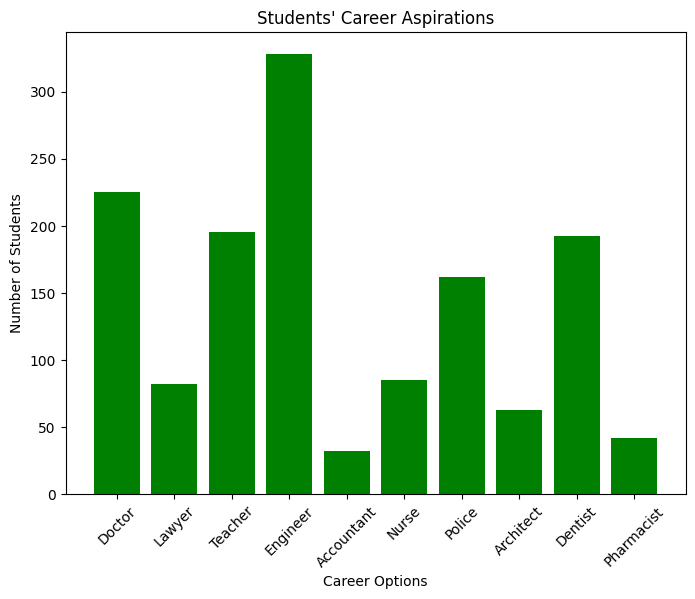

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(careerCounts.keys(), careerCounts.values(), color='green')
plt.xlabel('Career Options')
plt.ylabel('Number of Students')
plt.title('Students\' Career Aspirations')
plt.xticks(rotation=45)
plt.show()